In [7]:
import parselmouth
import tgt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

In [4]:
def extract_info(sound):
    pitch = sound.to_pitch(time_step=0.001, pitch_ceiling=300)
    intensity = sound.to_intensity(75, 0.001, subtract_mean=False)

    print("Here are the results:")
    for i in range(int((sound.tmax - sound.tmin) / 0.01)):
        time = sound.tmin + (i + 1) * 0.01
        p_value = pitch.get_value_at_time(time)
        i_value = intensity.get_value(time)
        print("{:.2f} {:.3f} {:.3f}".format(time, p_value, i_value))



In [10]:
track3_example_file= "../data/ZOOM0004b/ZOOM0004_Tr3.WAV"
tg_path = "../data/ZOOM0004b/ZOOM0004_Tr3.TextGrid"
text_grid = tgt.io.read_textgrid(tg_path, encoding='utf-8')
seal_call = parselmouth.Sound(track3_example_file)

Extract the good times from the tiers (those with "u")

In [8]:
good_annotations = text_grid.tiers[0].get_annotations_with_text(pattern="u")
start_times = [x.start_time for x in good_annotations]
end_times = [x.end_time for x in good_annotations]

In [14]:
good_seal_calls = []
for start, end in zip(start_times, end_times):
    good_seal_calls.append(seal_call.extract_part(from_time=start, to_time=end))
# first_call = seal_call.extract_part(from_time=2., to_time=4., preserve_times=True)
good_seal_calls
test_call = good_seal_calls[1]

In [15]:
from IPython.display import Audio

Audio(test_call.values, rate=test_call.sampling_frequency)

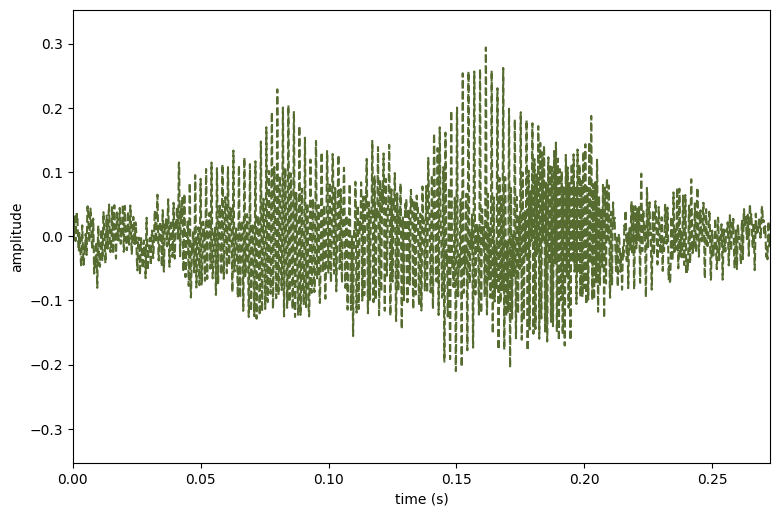

In [13]:
def plot_waveform(ax, sound, **kwargs):
    max_abs_val = np.max(np.abs(sound.values))
    ax.plot(sound.xs(), sound.values[0,:], **kwargs)
    ax.set_xlim(sound.xmin, sound.xmax)
    ax.set_ylim(-1.2 * max_abs_val, 1.2 * max_abs_val)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("amplitude")

fig, ax = plt.subplots()
plot_waveform(ax, good_seal_calls[1], linestyle='--', color='darkolivegreen')

In [16]:
spectrogram = test_call.to_spectrogram(window_length=0.03)
spectrogram

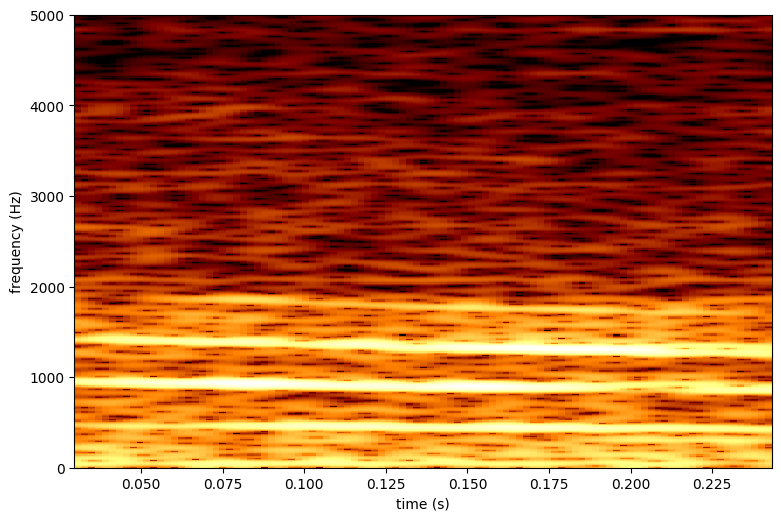

In [17]:
def draw_spectrogram(ax, spectrogram, dynamic_range=70, cmap='afmhot'):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    ax.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap=cmap)
    ax.set_ylim(spectrogram.ymin, spectrogram.ymax)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("frequency (Hz)")
    

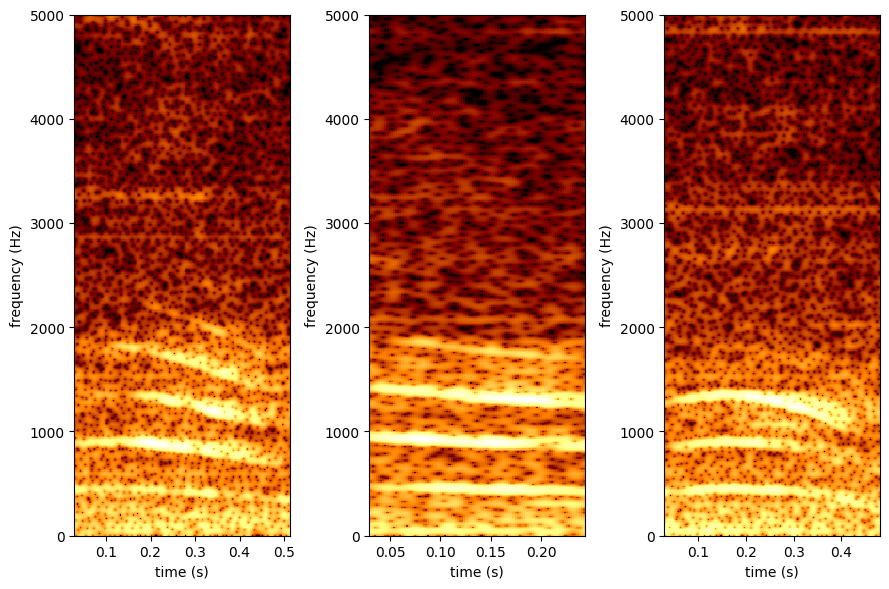

In [19]:
fig, axs = plt.subplots(1,3)
spectrograms = [call.to_spectrogram(window_length=0.03) for call in good_seal_calls]
[draw_spectrogram(ax, spectrogram) for ax, spectrogram in zip(axs, spectrograms)]
fig.tight_layout()
plt.show()

In [10]:
# Copyright (c) 2022 Alessio Quaresima
# 
# This software is released under the MIT License.
# https://opensource.org/licenses/MIT

